In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse

In [2]:
x = np.arange(0,270,10)
y = np.cos(x * np.pi/100 + np.random.normal(0, 0.15, len(x)))

df = pd.DataFrame({'x': x, 'y':y})
df.head()

,x,y
0,0,0.997711
1,10,0.862929
2,20,0.824586
3,30,0.500919
4,40,0.198087


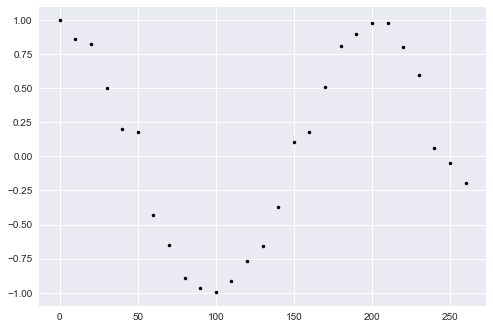

In [3]:
plt.style.use('seaborn')
plt.plot(df['x'], df['y'], 'k.')

In [4]:
df

,x,y
0,0,0.997711
1,10,0.862929
2,20,0.824586
3,30,0.500919
4,40,0.198087
5,50,0.178083
6,60,-0.427289
7,70,-0.649338
8,80,-0.893095
9,90,-0.962226


In [5]:
df1 = df.copy()

In [6]:
model_LR = LinearRegression()
model_RD = Ridge()
model_LS = Lasso()
model_EN = ElasticNet()

model_LR.fit(df1[['x']], df1['y'])
model_RD.fit(df1[['x']], df1['y'])
model_LS.fit(df1[['x']], df1['y'])
model_EN.fit(df1[['x']], df1['y'])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
#predictions

# tidak ada proses splitting data karna data dummies dan jumlah sangat sedikit (27 rows). Jika pakai dataset asli, sebaiknya tetap menjalankan splitting 

In [8]:
df1['y_LR'] = model_LR.predict(df1[['x']])
df1['y_RD'] = model_RD.predict(df1[['x']])
df1['y_LS'] = model_LS.predict(df1[['x']])
df1['y_EN'] = model_EN.predict(df1[['x']])

In [9]:
df1.head()

,x,y,y_LR,y_RD,y_LS,y_EN
0,0,0.997711,-0.042792,-0.042791,-0.021363,-0.032067
1,10,0.862929,-0.032071,-0.032070,-0.012291,-0.022171
2,20,0.824586,-0.021351,-0.021350,-0.003219,-0.012276
3,30,0.500919,-0.010630,-0.010629,0.005853,-0.002380
4,40,0.198087,0.000091,0.000091,0.014926,0.007515


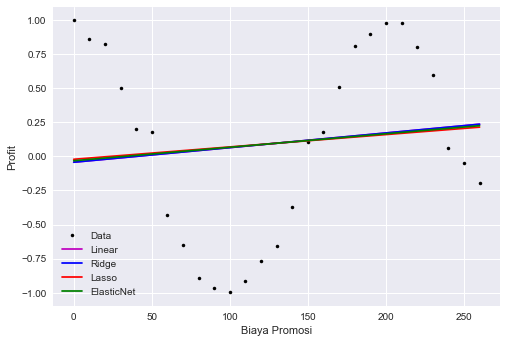

In [10]:
plt.plot(df1['x'], df1['y'], 'k.')
plt.plot(df1['x'], df1['y_LR'], 'm-')
plt.plot(df1['x'], df1['y_RD'], 'b-')
plt.plot(df1['x'], df1['y_LS'], 'r-')
plt.plot(df1['x'], df1['y_EN'], 'g-')

plt.legend(['Data','Linear','Ridge','Lasso','ElasticNet'])
plt.xlabel('Biaya Promosi')
plt.ylabel('Profit')
plt.show()

In [11]:
# tidak ada model yg bisa mengikuti trend, maka kita akan mencoba menggunakan polynomial regression

In [12]:
print('RMSE y_LR: ', np.sqrt(mse(df1['y'], df1['y_LR'])))
print('RMSE y_RD: ', np.sqrt(mse(df1['y'], df1['y_RD'])))
print('RMSE y_LS: ', np.sqrt(mse(df1['y'], df1['y_LS'])))
print('RMSE y_EN: ', np.sqrt(mse(df1['y'], df1['y_EN'])))


RMSE y_LR:  0.6763348884288696
RMSE y_RD:  0.6763348884290618
RMSE y_LS:  0.6764567365847772
RMSE y_EN:  0.676365412845894


## Menghitung Polynomial (Pemangkatan) secara Manual

In [13]:
for i in range(2,10):
    df1[f'x{i}'] = df1['x'] ** i

df1.head()

,x,y,y_LR,y_RD,y_LS,y_EN,x2,x3,x4,x5,x6,x7,x8,x9
0,0,0.997711,-0.042792,-0.042791,-0.021363,-0.032067,0,0,0,0,0,0,0,0
1,10,0.862929,-0.032071,-0.032070,-0.012291,-0.022171,100,1000,10000,100000,1000000,10000000,100000000,1000000000
2,20,0.824586,-0.021351,-0.021350,-0.003219,-0.012276,400,8000,160000,3200000,64000000,1280000000,25600000000,512000000000
3,30,0.500919,-0.010630,-0.010629,0.005853,-0.002380,900,27000,810000,24300000,729000000,21870000000,656100000000,19683000000000
4,40,0.198087,0.000091,0.000091,0.014926,0.007515,1600,64000,2560000,102400000,4096000000,163840000000,6553600000000,262144000000000


In [14]:
model_poly = LinearRegression()
model_poly.fit(df1[['x','x2']],df1['y'])

df1['y_poly2'] = model_poly.predict(df1[['x','x2']])
df1.head()

,x,y,y_LR,y_RD,y_LS,y_EN,x2,x3,x4,x5,x6,x7,x8,x9,y_poly2
0,0,0.997711,-0.042792,-0.042791,-0.021363,-0.032067,0,0,0,0,0,0,0,0,0.617907
1,10,0.862929,-0.032071,-0.032070,-0.012291,-0.022171,100,1000,10000,100000,1000000,10000000,100000000,1000000000,0.476159
2,20,0.824586,-0.021351,-0.021350,-0.003219,-0.012276,400,8000,160000,3200000,64000000,1280000000,25600000000,512000000000,0.346608
3,30,0.500919,-0.010630,-0.010629,0.005853,-0.002380,900,27000,810000,24300000,729000000,21870000000,656100000000,19683000000000,0.229254
4,40,0.198087,0.000091,0.000091,0.014926,0.007515,1600,64000,2560000,102400000,4096000000,163840000000,6553600000000,262144000000000,0.124099


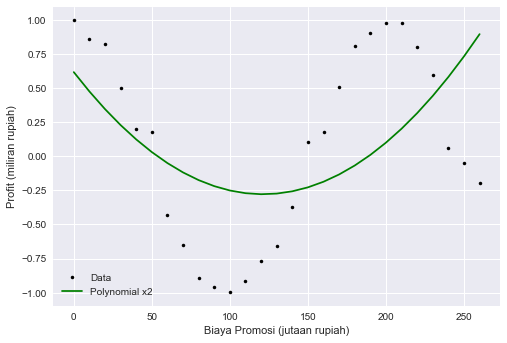

In [15]:
plt.plot(df['x'],df1['y'],'k.')
plt.plot(df['x'],df1['y_poly2'],'g-')

plt.legend(['Data','Polynomial x2'])
plt.xlabel('Biaya Promosi (jutaan rupiah)')
plt.ylabel('Profit (miliran rupiah)')
plt.show()

In [16]:
# Dari visualisasi di atas, polynomial dengan x pangkat 2 belum bisa membuat prediksi yang fit dengan data aktual

In [17]:
#cara manual membuat polynomial dengan model linear regression dengan for loop

In [18]:
model_poly = LinearRegression()

xn = ['x']
for i in range(2,7):
    df1[f'x{i}'] = df1['x'] ** i
    xn.append(f'x{i}') #proses pemangkatan sudah kita lakukan diatas
    model_poly.fit(df1[xn], df1['y']) #fitting model 
    df1[f'y_Poly{i}'] = model_poly.predict(df1[xn]) #prediksi


In [19]:
df1

,x,y,y_LR,y_RD,y_LS,y_EN,x2,x3,x4,x5,x6,x7,x8,x9,y_poly2,y_Poly2,y_Poly3,y_Poly4,y_Poly5,y_Poly6
0,0,0.997711,-0.042792,-0.042791,-0.021363,-0.032067,0,0,0,0,0,0,0,0,0.617907,0.617907,1.682611,1.200488,0.865394,0.973844
1,10,0.862929,-0.032071,-0.032070,-0.012291,-0.022171,100,1000,10000,100000,1000000,10000000,100000000,1000000000,0.476159,0.476159,1.049461,0.938202,0.989755,0.923017
2,20,0.824586,-0.021351,-0.021350,-0.003219,-0.012276,400,8000,160000,3200000,64000000,1280000000,25600000000,512000000000,0.346608,0.346608,0.526789,0.652882,0.874560,0.772784
3,30,0.500919,-0.010630,-0.010629,0.005853,-0.002380,900,27000,810000,24300000,729000000,21870000000,656100000000,19683000000000,0.229254,0.229254,0.106404,0.362300,0.609755,0.543015
4,40,0.198087,0.000091,0.000091,0.014926,0.007515,1600,64000,2560000,102400000,4096000000,163840000000,6553600000000,262144000000000,0.124099,0.124099,-0.219883,0.081968,0.268904,0.260052
5,50,0.178083,0.010811,0.010812,0.023998,0.017411,2500,125000,6250000,312500000,15625000000,781250000000,39062500000000,1953125000000000,0.031140,0.031140,-0.460262,-0.174858,-0.089520,-0.046578
6,60,-0.427289,0.021532,0.021532,0.033070,0.027306,3600,216000,12960000,777600000,46656000000,2799360000000,167961600000000,10077696000000000,-0.049621,-0.049621,-0.622923,-0.397180,-0.420857,-0.347013
7,70,-0.649338,0.032252,0.032252,0.042142,0.037202,4900,343000,24010000,1680700000,117649000000,8235430000000,576480100000000,40353607000000000,-0.118184,-0.118184,-0.716056,-0.576257,-0.692974,-0.613472
8,80,-0.893095,0.042973,0.042973,0.051214,0.047098,6400,512000,40960000,3276800000,262144000000,20971520000000,1677721600000000,134217728000000000,-0.174550,-0.174550,-0.747852,-0.705606,-0.884981,-0.822236
9,90,-0.962226,0.053693,0.053693,0.060287,0.056993,8100,729000,65610000,5904900000,531441000000,47829690000000,4304672100000000,387420489000000000,-0.218718,-0.218718,-0.726500,-0.781001,-0.985949,-0.955195


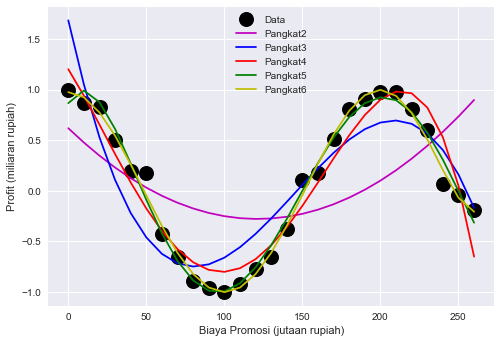

In [20]:
plt.plot(df1['x'], df1['y'],'k.', ms=30)
plt.plot(df1['x'], df1['y_Poly2'],'m-')
plt.plot(df1['x'], df1['y_Poly3'],'b-')
plt.plot(df1['x'], df1['y_Poly4'],'r-')
plt.plot(df1['x'], df1['y_Poly5'],'g-')
plt.plot(df1['x'], df1['y_Poly6'],'y-')

plt.legend(['Data','Pangkat2','Pangkat3','Pangkat4','Pangkat5','Pangkat6'])
plt.xlabel('Biaya Promosi (jutaan rupiah)')
plt.ylabel('Profit (miliaran rupiah)')
plt.show()



In [21]:
for i in range (2,7):
    print(f'RMSE y_Poly{i}', np.sqrt(mse(df1['y'], df1[f'y_Poly{i}'])))
    print(f'MedAe y_Poly{i}', np.median(abs(df1['y'] - df1[f'y_Poly{i}'])))

RMSE y_Poly2 0.5902248051081935
MedAe y_Poly2 0.48958842201045405
RMSE y_Poly3 0.30900883231822507
MedAe y_Poly3 0.28240749157309675
RMSE y_Poly4 0.20280249571307732
MedAe y_Poly4 0.1534109632342714
RMSE y_Poly5 0.09939066749791925
MedAe y_Poly5 0.05604825100507238
RMSE y_Poly6 0.07433851050204865
MedAe y_Poly6 0.04209555061862025


## CARA OTOMATIS

In [133]:
from sklearn.preprocessing import PolynomialFeatures as PF

### Uji Coba

In [168]:
data_a = [2]
data_a_poly = PF(5, include_bias=False) #include_bias = False <- spy tidak menikutsertakan 2 pangkat nol
data_a_poly.fit_transform([data_a])

array([[ 2.,  4.,  8., 16., 32.]])

In [169]:
# uji coba 2 = hanya 1 kolom
data_b = [3,6,9]
data_b_poly = PF(5, include_bias=False)
bp = data_b_poly.fit_transform(np.array(data_b).reshape(-1,1).tolist()) #bp adalah tabel yg masih berbentuk array
pd.DataFrame(bp)

,0,1,2,3,4
0,3.0,9.0,27.0,81.0,243.0
1,6.0,36.0,216.0,1296.0,7776.0
2,9.0,81.0,729.0,6561.0,59049.0


In [170]:
bp

array([[3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02],
       [6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03],
       [9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04]])

In [138]:
# uji coba 3 = data berupa dataframe
df2 = pd.DataFrame({'c':np.arange(1,11)})

cpoly = PF(5, include_bias=False)
cp = cpoly.fit_transform(df2[['c']])
df_cp = pd.DataFrame(cp)

#hasilnya digabungkan dengan cara concat
df3 = pd.concat([df2, df_cp], axis=1)
df3

,c,0,1,2,3,4
0,1,1.0,1.0,1.0,1.0,1.0
1,2,2.0,4.0,8.0,16.0,32.0
2,3,3.0,9.0,27.0,81.0,243.0
3,4,4.0,16.0,64.0,256.0,1024.0
4,5,5.0,25.0,125.0,625.0,3125.0
5,6,6.0,36.0,216.0,1296.0,7776.0
6,7,7.0,49.0,343.0,2401.0,16807.0
7,8,8.0,64.0,512.0,4096.0,32768.0
8,9,9.0,81.0,729.0,6561.0,59049.0
9,10,10.0,100.0,1000.0,10000.0,100000.0


# MAKE PIPELINE

In [139]:
from sklearn.pipeline import make_pipeline

In [140]:
df4 = df.copy()

In [142]:
# membuat pipeline (jalur) menjalankan polynomial feature, lalu menjalankan linear regression
poly_reg = make_pipeline(
    PF(4,include_bias=False),
    LinearRegression()
)

In [144]:
#fitting model
poly_reg.fit(df4[['x']],df4['y'])

#predict
df4['y"4'] = poly_reg.predict(df4[['x']])

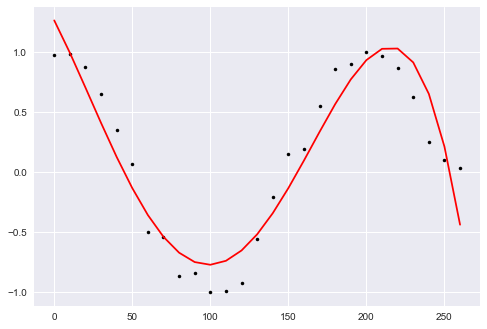

In [146]:
# visualize

plt.plot(df4['x'], df4['y'], 'k.')
plt.plot(df4['x'], df4['y"4'], 'r-')
plt.show()

<hr>

# **Take Home Exercise**
1. Dataset yang digunakan adalah __Admission_Predict.csv__. 

2. __Variabel__ : ``X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'``, ``Y = Chance of Admit``

3. __Urutan percobaan__ (train 80% test 20%):

    3.a) Variabel independent ``tidak ada intervensi sama sekali`` + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    3.b) ``Handling outlier`` + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    3.c) ``Handling outlier + Scalling`` + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
4. Di setiap percobaan tampilkan MAE dan RMSE

5. Tentukan percobaan dan model apa yang terbaik untuk memprediksi ``Chance of Admit``